# importing required packages

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import pickle as pk

In [160]:
df = pd.read_csv('cardetails.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


# EDA - DF.INFO()

In [161]:
df.info()#Default is True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [162]:
# WE CAN VIEW FEW COLUMN INFO AND SINGLE COLUMN INFO
#print(df[['name','year']].info())#Default is True
#print(df['max_power'].info())

#=======================

#print(df.info(verbose = False))

print(df['name'].info(verbose = False))

<class 'pandas.core.series.Series'>
RangeIndex: 8128 entries, 0 to 8127
dtypes: object(1)
memory usage: 63.6+ KB
None




# EDA -2-DF.DESCRIBE()

In [163]:
#print("NUMBER OF COLUMNS IN DF",len(df.columns))
#print(df.columns)
#print("--------------")

#print("df.describe - only numeric columns\n",df.describe())#it will only gives numeric columns if there is no numeric
#columns else it will give categorical column

#print("rount off the output to 2 digits\n",round(number = df.describe(), ndigits=1))

#print("number of numeric columns in describe",len(df.describe().columns)) ##this will show the numeriic columns count

#print("by default df.describe gives .25 .50 .75 percentile\n", df.describe(percentiles=[.25,.50,.75]))
#if you want custom percentile in the describe means like .30 .60 use the below code
#print("custom percentile in df.describe()",df.describe(percentiles=[.30,.60,.80]))

#print("transaspose of df.describe() only shows numeric colums",df.describe().T)
#print("================")

print("To incude object columns in df.describe()",df.describe(include='object'))
#if there is no object it will throw error message like "valueerror:no objects to concotenate "

#print("include all the objects in df.describe()", df.describe(include = 'all'))

#print("transapose include all the objects in df.describe()", df.describe(include = 'all').T)

To incude object columns in df.describe()                           name    fuel seller_type transmission        owner  \
count                     8128    8128        8128         8128         8128   
unique                    2058       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       129    4402        6766         7078         5289   

          mileage   engine max_power          torque  
count        7907     7907      7913            7906  
unique        393      121       322             441  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          225     1017       377             530  


# EDA -3-RENAME COLUMNS IF ITS NOT GIVEN

# EDA -4-DF.NDIM()

In [164]:
print("data dimension is",df.ndim)

data dimension is 2


# EDA -5-DF.SHAPE()

In [165]:
print(df.shape)

print ("number of rows",df.shape[0])
print("number of columns",df.shape[1])

print("total number of data",df.shape[0] * df.shape[1])

(8128, 13)
number of rows 8128
number of columns 13
total number of data 105664


# EDA -6-DF.size

In [166]:
print(df.size)

print(len(df.columns))

print(len(df))

print(len(df) * len(df.columns))

105664
13
8128
105664


# EDA -7-DF.type()

In [167]:
#print("data type", type(df))

#print("data type for single column", type(df['name']))

print("data type for multiple columns", type(df[['name','year']]))#we have to give two [][] beacause we are using two coluns
#if we give [] it will throw error

data type for multiple columns <class 'pandas.core.frame.DataFrame'>


# EDA -7-DF.head()

In [168]:
#print("top 5 rows only",df.head())

#print("number of rows",df.shape[0])

#print("------------------")

#print("customization of bottom rows only",df.head(10))

print(df.tail(-7))#removes bottom 7 rows and shows all the other reords

                                      name  year  selling_price  km_driven  \
7                       Maruti 800 DX BSII  2001          45000       5000   
8                         Toyota Etios VXD  2011         350000      90000   
9     Ford Figo Diesel Celebration Edition  2013         200000     169000   
10         Renault Duster 110PS Diesel RxL  2014         500000      68000   
11                           Maruti Zen LX  2005          92000     100000   
...                                    ...   ...            ...        ...   
8123                     Hyundai i20 Magna  2013         320000     110000   
8124                 Hyundai Verna CRDi SX  2007         135000     119000   
8125                Maruti Swift Dzire ZDi  2009         382000     120000   
8126                       Tata Indigo CR4  2013         290000      25000   
8127                       Tata Indigo CR4  2013         290000      25000   

        fuel seller_type transmission                 owner    

# EDA -8-DF.tail()


In [169]:
#print("bottom 5 rows only",df.tail())

#print("number of rows",df.shape[0])

#print("------------------")

print("customization of bottom rows only",df.tail(10))

print(df.head(-7))#removes top 7 rows and shows all the other reords

customization of bottom rows only                                    name  year  selling_price  km_driven  \
8118                  Hyundai i20 Magna  2013         380000      25000   
8119        Maruti Wagon R LXI Optional  2017         360000      80000   
8120            Hyundai Santro Xing GLS  2008         120000     191000   
8121  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
8122         Hyundai i20 Magna 1.4 CRDi  2014         475000      80000   
8123                  Hyundai i20 Magna  2013         320000     110000   
8124              Hyundai Verna CRDi SX  2007         135000     119000   
8125             Maruti Swift Dzire ZDi  2009         382000     120000   
8126                    Tata Indigo CR4  2013         290000      25000   
8127                    Tata Indigo CR4  2013         290000      25000   

        fuel seller_type transmission                 owner     mileage  \
8118  Petrol  Individual       Manual           First Owner   18.

# EDA -9-DF.columns()

In [170]:
print(df.columns)
print(type(df.columns))
print(df.columns.dtype)
print("===================")

print("df.columns.format()",df.columns.format())#returns columns in list

print("retuen length of the colums",len(df.columns.format()))#returns length of the  columns

print("return type of the colums",type(df.columns.format()))#returns type of the  columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>
object
df.columns.format() ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']
retuen length of the colums 13
return type of the colums <class 'list'>


# EDA -10-DF.values()

In [171]:
print("row wise valuse\n", df.values)#it changes data frame in to numpy
print("number of rows",len(df.values))#returns number of rows in the dataset

print("tye of rows",type(df.values))#returns type of rows in the dataset

row wise valuse
 [['Maruti Swift Dzire VDI' 2014 450000 ... '74 bhp' '190Nm@ 2000rpm' 5.0]
 ['Skoda Rapid 1.5 TDI Ambition' 2014 370000 ... '103.52 bhp'
  '250Nm@ 1500-2500rpm' 5.0]
 ['Honda City 2017-2020 EXi' 2006 158000 ... '78 bhp'
  '12.7@ 2,700(kgm@ rpm)' 5.0]
 ...
 ['Maruti Swift Dzire ZDi' 2009 382000 ... '73.9 bhp' '190Nm@ 2000rpm'
  5.0]
 ['Tata Indigo CR4' 2013 290000 ... '70 bhp' '140Nm@ 1800-3000rpm' 5.0]
 ['Tata Indigo CR4' 2013 290000 ... '70 bhp' '140Nm@ 1800-3000rpm' 5.0]]
number of rows 8128
tye of rows <class 'numpy.ndarray'>


# EDA -11-DF.unique()

In [172]:
print(df["name"].unique())#gives unique values in specific colums

print(len(df["name"].unique()))#gives length of unique values in specific colums

print(type(df["name"].unique()))#gives type of unique values in specific colums

print(df["name"].unique().dtype)#gives data type of unique values in specific colums

['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
2058
<class 'numpy.ndarray'>
object


# EDA -12-DF.nunique()

In [173]:
print(df["name"].nunique())#gives number of unique values in specific colums

print(type(df["name"].unique()))#gives type of unique values in specific colums

print(df["name"].unique().dtype)#gives data type of unique values in specific colums

2058
<class 'numpy.ndarray'>
object


In [174]:
#unique and nunique to all columns using for loop
#unique represents pd and nunique represents df

for col in df.columns:
    print("name of the column is",col)
   #print("number of unique values from column",col,"columns",df[col].nunique())
    print("date of unique values from column",col,"columns",df[col].unique())
   #print("type of unique values from column",col,"columns",type(df[col].unique()))
   #print("data type of unique values from column",col,"columns",df[col].unique().dtype)

name of the column is name
date of unique values from column name columns ['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
name of the column is year
date of unique values from column year columns [2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2003 2019 2008 2020 1999 2000 1983 2004 1996 1994 1995 1998 1997
 1991]
name of the column is selling_price
date of unique values from column selling_price columns [  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000    70000   730000   650000   330000
   366000  1149000   425000  2100000   925000   675000   819999   390000
  1500000   700000  1450000  109000

# Number of Lables : Cardinality

In [175]:
df.describe(exclude=[np.number])#describes and tells the count of unique values in each categorical column

#df.describe()


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,8128,8128,8128,8128,8128,7907,7907,7913,7906
unique,2058,4,3,2,5,393,121,322,441
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,129,4402,6766,7078,5289,225,1017,377,530


In [176]:
for cardinal in df:
    if df[cardinal].dtype == 'O':#find only the categorical column datatype is(object)#FOR INTEGER USE i8
        print(cardinal, "contains", len(df[cardinal].unique()), "lables")

name contains 2058 lables
fuel contains 4 lables
seller_type contains 3 lables
transmission contains 2 lables
owner contains 5 lables
mileage contains 394 lables
engine contains 122 lables
max_power contains 323 lables
torque contains 442 lables


# EDA -13-DF.VALUE_COUNTS()

In [177]:
##absolute frequency -represents raw count of each unique values without considering the total number of values in the dataset
print("UNIQUE VALUES DF['year'].VALUE_COUNTS(NORMALIZE = False) - ABSOLUTE FREQUENCY - counts the number of occurances",
      df['year'].value_counts(normalize = False))

UNIQUE VALUES DF['year'].VALUE_COUNTS(NORMALIZE = False) - ABSOLUTE FREQUENCY - counts the number of occurances year
2017    1018
2016     859
2018     807
2015     776
2013     670
2012     651
2014     621
2011     592
2019     583
2010     394
2009     246
2008     214
2007     183
2006     124
2005      97
2020      74
2004      62
2003      49
2002      27
2000      22
1999      18
1997      11
2001      10
1998      10
1996       3
1994       3
1995       2
1983       1
1991       1
Name: count, dtype: int64


In [178]:
##relative frequency-represents the portion of percentages of occurances of each unique value related to the total value in dataset
print("UNIQUE VALUES DF['year'].VALUE_COUNTS(NORMALIZE = True) - relative FREQUENCY - counts the number of occurances",
      df['year'].value_counts(normalize = True))

UNIQUE VALUES DF['year'].VALUE_COUNTS(NORMALIZE = True) - relative FREQUENCY - counts the number of occurances year
2017    0.125246
2016    0.105684
2018    0.099286
2015    0.095472
2013    0.082431
2012    0.080094
2014    0.076403
2011    0.072835
2019    0.071727
2010    0.048474
2009    0.030266
2008    0.026329
2007    0.022515
2006    0.015256
2005    0.011934
2020    0.009104
2004    0.007628
2003    0.006029
2002    0.003322
2000    0.002707
1999    0.002215
1997    0.001353
2001    0.001230
1998    0.001230
1996    0.000369
1994    0.000369
1995    0.000246
1983    0.000123
1991    0.000123
Name: proportion, dtype: float64


In [179]:
#relative frequency in percentage
print("UNIQUE VALUES DF['year'].VALUE_COUNTS(NORMALIZE = True) - relative FREQUENCY - counts the number of occurances",
      df['year'].value_counts(normalize = True)*100)

UNIQUE VALUES DF['year'].VALUE_COUNTS(NORMALIZE = True) - relative FREQUENCY - counts the number of occurances year
2017    12.524606
2016    10.568406
2018     9.928642
2015     9.547244
2013     8.243110
2012     8.009350
2014     7.640256
2011     7.283465
2019     7.172736
2010     4.847441
2009     3.026575
2008     2.632874
2007     2.251476
2006     1.525591
2005     1.193406
2020     0.910433
2004     0.762795
2003     0.602854
2002     0.332185
2000     0.270669
1999     0.221457
1997     0.135335
2001     0.123031
1998     0.123031
1996     0.036909
1994     0.036909
1995     0.024606
1983     0.012303
1991     0.012303
Name: proportion, dtype: float64


In [180]:
#sum

print("returns number of uique values in single column DF['year'].VALUE_COUNTS(dropna=False)",
      df['year'].value_counts(dropna=False).sum())

print("returns number of uique values in single column DF['year'].VALUE_COUNTS(dropna=True)",
      df['year'].value_counts(dropna=True).sum())

returns number of uique values in single column DF['year'].VALUE_COUNTS(dropna=False) 8128
returns number of uique values in single column DF['year'].VALUE_COUNTS(dropna=True) 8128


In [181]:
#sorting accessending and descenting #defaultly it will sort in true
print("sorting in ascenting",df['year'].value_counts(sort=True))#sort by values- sorts highest to lowest value counts
print("sorting in descenting",df['year'].value_counts(sort=False))# fetching as it is in the feature

sorting in ascenting year
2017    1018
2016     859
2018     807
2015     776
2013     670
2012     651
2014     621
2011     592
2019     583
2010     394
2009     246
2008     214
2007     183
2006     124
2005      97
2020      74
2004      62
2003      49
2002      27
2000      22
1999      18
1997      11
2001      10
1998      10
1996       3
1994       3
1995       2
1983       1
1991       1
Name: count, dtype: int64
sorting in descenting year
2014     621
2006     124
2010     394
2007     183
2017    1018
2001      10
2011     592
2013     670
2005      97
2009     246
2016     859
2012     651
2002      27
2015     776
2018     807
2003      49
2019     583
2008     214
2020      74
1999      18
2000      22
1983       1
2004      62
1996       3
1994       3
1995       2
1998      10
1997      11
1991       1
Name: count, dtype: int64


In [182]:
#it gives in descenting order

print("sorting in ascenting",df['year'].value_counts(ascending=True))#sort in ascending 
print("sorting in descenting",df['year'].value_counts(ascending=False))# sort in descenting

sorting in ascenting year
1991       1
1983       1
1995       2
1996       3
1994       3
2001      10
1998      10
1997      11
1999      18
2000      22
2002      27
2003      49
2004      62
2020      74
2005      97
2006     124
2007     183
2008     214
2009     246
2010     394
2019     583
2011     592
2014     621
2012     651
2013     670
2015     776
2018     807
2016     859
2017    1018
Name: count, dtype: int64
sorting in descenting year
2017    1018
2016     859
2018     807
2015     776
2013     670
2012     651
2014     621
2011     592
2019     583
2010     394
2009     246
2008     214
2007     183
2006     124
2005      97
2020      74
2004      62
2003      49
2002      27
2000      22
1999      18
1997      11
2001      10
1998      10
1996       3
1994       3
1995       2
1983       1
1991       1
Name: count, dtype: int64


In [183]:
#max min

print("maximum value counts",df['year'].value_counts().max())

print("minimum value counts",df['year'].value_counts().min())


print("maximum value counts in specified index ",df['year'].value_counts().argmax())#it displays the maximum values ocured index

print("minimum value counts in specified index ",df['year'].value_counts().argmin())#it displayes the minimum value occuered index

maximum value counts 1018
minimum value counts 1
maximum value counts in specified index  0
minimum value counts in specified index  27


In [184]:
print("lexograpical sording or dictionary sorting \n",df['name'].sort_index())#lexograpical sording or dictionary sorting

lexograpical sording or dictionary sorting 
 0             Maruti Swift Dzire VDI
1       Skoda Rapid 1.5 TDI Ambition
2           Honda City 2017-2020 EXi
3          Hyundai i20 Sportz Diesel
4             Maruti Swift VXI BSIII
                    ...             
8123               Hyundai i20 Magna
8124           Hyundai Verna CRDi SX
8125          Maruti Swift Dzire ZDi
8126                 Tata Indigo CR4
8127                 Tata Indigo CR4
Name: name, Length: 8128, dtype: object


In [185]:
#value count to all columns
for col in df:
    print("column name is",col)
    
    #absolute frequency to each column
    
    print("absolute frequency to each column",df[col].value_counts(normalize=False))

column name is name
absolute frequency to each column name
Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: count, Length: 2058, dtype: int64
column name is year
absolute frequency to each column year
2017    1018
2016     859
2018     807
2015     776
2013     670
2012     651
2014     621
2011     592
2019     583
2010     394
2009     246
2008     214
2007     183
2006     124
2005      97
2020      74
2004      62
2003      49
200

In [186]:
#bins - Rather tha value counts ,group them into half open bins cut, only works with numeric data
#print(df['year'].value_counts(normalize=False))
data  = df['year']
yearrange= data.value_counts(bins=5,sort =False)
print(yearrange)

year
(1982.962, 1990.4]       1
(1990.4, 1997.8]        20
(1997.8, 2005.2]       295
(2005.2, 2012.6]      2404
(2012.6, 2020.0]      5408
Name: count, dtype: int64


In [187]:
#missing values and percentage of missing values

for col in df:
    print(col,"column has",df[col].notna().sum(),"values and", df[col].isna().sum(),"missing values")

name column has 8128 values and 0 missing values
year column has 8128 values and 0 missing values
selling_price column has 8128 values and 0 missing values
km_driven column has 8128 values and 0 missing values
fuel column has 8128 values and 0 missing values
seller_type column has 8128 values and 0 missing values
transmission column has 8128 values and 0 missing values
owner column has 8128 values and 0 missing values
mileage column has 7907 values and 221 missing values
engine column has 7907 values and 221 missing values
max_power column has 7913 values and 215 missing values
torque column has 7906 values and 222 missing values
seats column has 7907 values and 221 missing values


In [188]:
#inbuilt function -any all ,any - search for any one not null value and gives true, all searches all not null value, 
#if any null value occurs it will result in false

df.notna().any()

df.notna().all()

name              True
year              True
selling_price     True
km_driven         True
fuel              True
seller_type       True
transmission      True
owner             True
mileage          False
engine           False
max_power        False
torque           False
seats            False
dtype: bool

In [189]:
#discrete and continuous data 
#discrete - limited in ranga
#continuous - unlimited

# print("min of year",min(df['year']))
# print("max of year",max(df['year']))

data  = df['year']
yearrange= data.value_counts(bins=[1983,1990, 1991, 1999,2001,2020], sort =False)#
#yearrange= data.value_counts(bins=[1983,1990, 1985, 1999,2001,2020], sort =False)#valueerror: bins nmust increase monotonically
print(yearrange)


year
(1982.999, 1990.0]       1
(1990.0, 1991.0]         1
(1991.0, 1999.0]        47
(1999.0, 2001.0]        32
(2001.0, 2020.0]      8047
Name: count, dtype: int64


In [190]:
#finding percentage of missing values in eah column

print("number of total number of df",len(df))
#missingpercent=df.isna().sum()/len(df)*100
occuringpercentage=df.notna().sum()/len(df)*100
#print(missingpercent)
print(occuringpercentage)


number of total number of df 8128
name             100.000000
year             100.000000
selling_price    100.000000
km_driven        100.000000
fuel             100.000000
seller_type      100.000000
transmission     100.000000
owner            100.000000
mileage           97.281004
engine            97.281004
max_power         97.354823
torque            97.268701
seats             97.281004
dtype: float64


In [191]:
df.notna().mean()

#df.isnull().mean()

name             1.000000
year             1.000000
selling_price    1.000000
km_driven        1.000000
fuel             1.000000
seller_type      1.000000
transmission     1.000000
owner            1.000000
mileage          0.972810
engine           0.972810
max_power        0.973548
torque           0.972687
seats            0.972810
dtype: float64

# EDA -15-DF.dtypes

In [192]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

# EDA -16-DF.groupby

In [193]:
df['year'].count()

print(df.groupby(['year'])['selling_price'].value_counts())

print(df.groupby(['transmission'])['fuel'].value_counts())

year  selling_price
1983  300000           1
1991  55000            1
1994  120000           1
      99000            1
      45000            1
                      ..
2020  265000           1
      330000           1
      390000           1
      399000           1
      7200000          1
Name: count, Length: 2275, dtype: int64
transmission  fuel  
Automatic     Diesel     534
              Petrol     516
Manual        Diesel    3868
              Petrol    3115
              CNG         57
              LPG         38
Name: count, dtype: int64


# VISUALIZATION

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


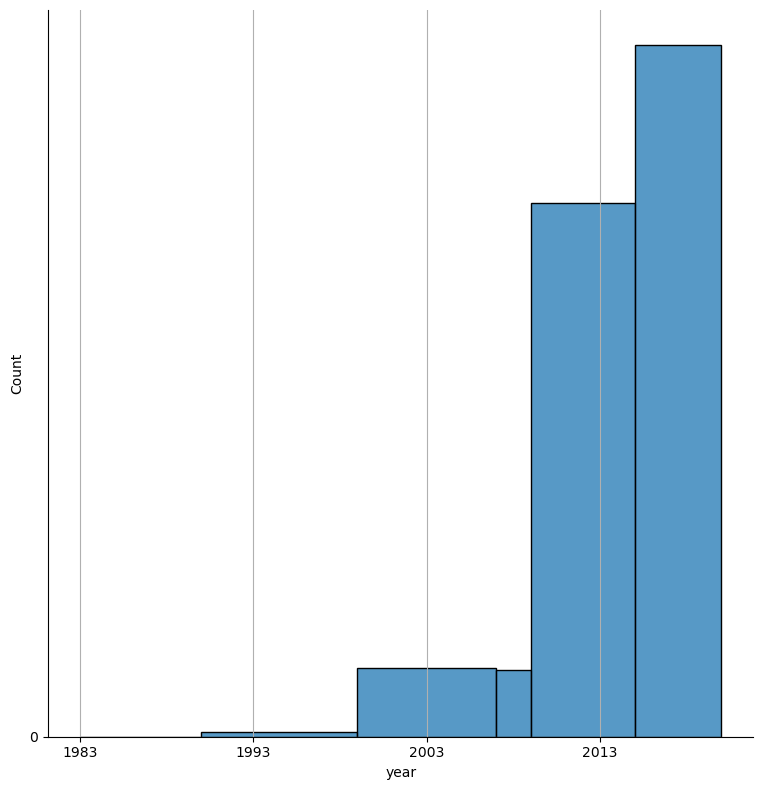

In [194]:
#this is single plot in seaborn

# print(min(df['year']))
# print(max(df['year']))

sns.displot(data=df,x=df["year"],bins=[1983,1990,1999,2007,2009,2015,2020],height=8)

plt.xticks(range(1983,2020,10))
plt.yticks(range(0,10,10))

plt.grid()
plt.show()

In [251]:
numerical_dt = df[['year','selling_price','km_driven','mileage','seats']]

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


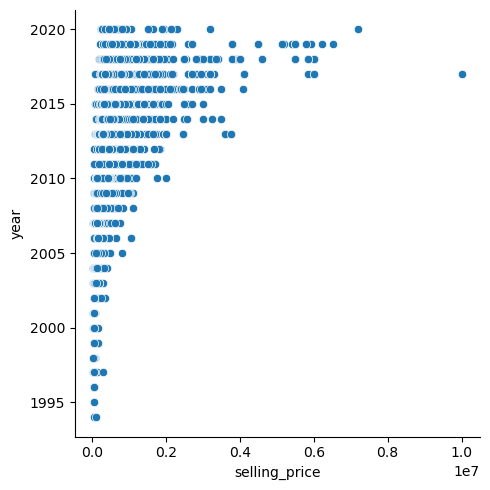

In [328]:
sns.relplot(x='selling_price',y='year',data=df)

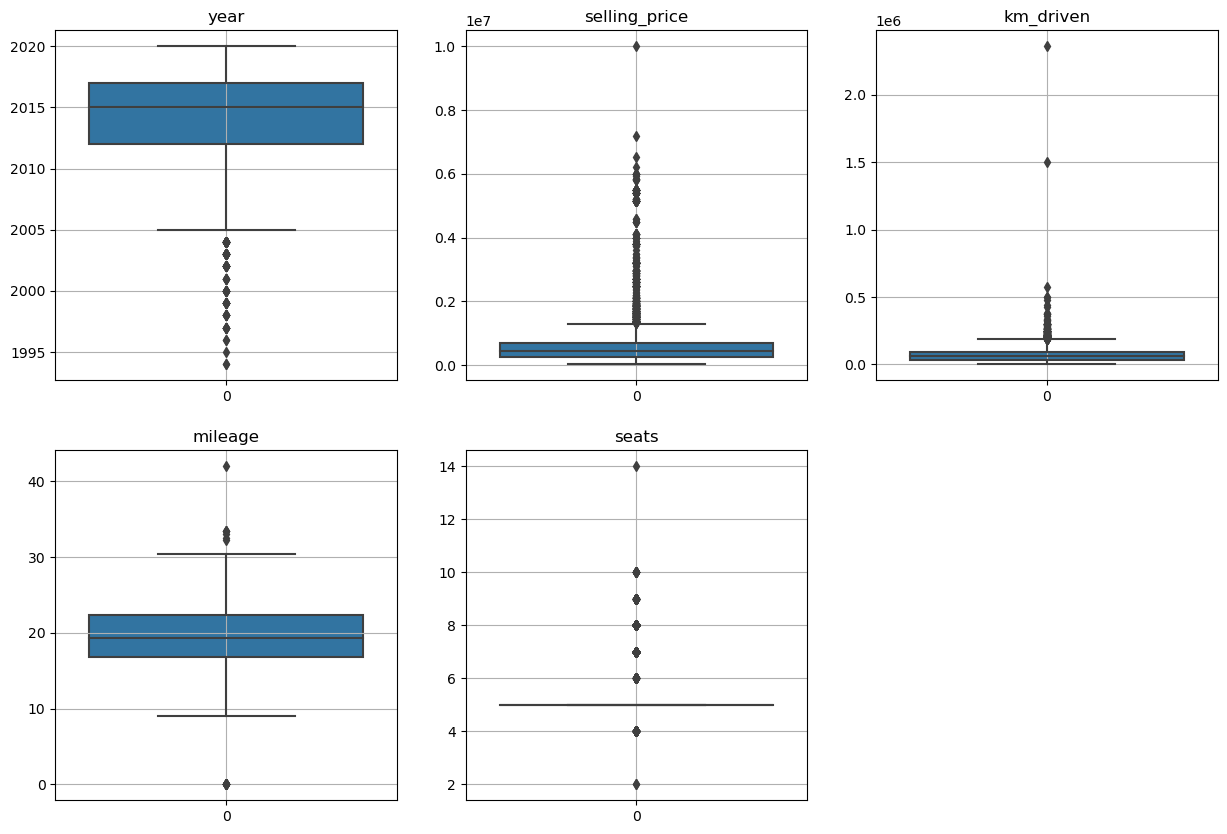

In [327]:
#BOX PLOT FOR ALL COLUMNS USING FOR LOOP

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_dt, start=1):
    plt.subplot(2,3,i)
    sns.boxplot(df[col])
    plt.title(col)
    plt.grid(True)